In [1]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook



def read_arduino(ser,inputBufferSize):
#     data = ser.readline((inputBufferSize+1)*2)
    data = ser.read((inputBufferSize+1)*2)
    out =[(int(data[i])) for i in range(0,len(data))]
    return out

def process_data(data):
    data_in = np.array(data)
    result = []
    i = 1
    while i < len(data_in)-1:
        if data_in[i] > 127:
            # Found beginning of frame
            # Extract one sample from 2 bytes
            intout = (np.bitwise_and(data_in[i],127))*128
            i = i + 1
            intout = intout + data_in[i]
            result = np.append(result,intout)
        i=i+1
    return np.flip(np.array(result)-512)



# ser.read works by waiting for <inputBufferSize> bytes from the port

def read_arduinbro(wav_array, inputBufferSize, k):
#    data = ser.readline(inputBufferSize)
    if inputBufferSize*(k+1) < len(wav_array):
        data = wav_array[(inputBufferSize*(k)):(inputBufferSize*(k+1))]
    else:
        data = wav_array[(inputBufferSize*(k))::]
    return np.flip(data)





In [2]:
# use this to find ports
from serial.tools import list_ports



# import serial.tools.list_ports


ports = list_ports.comports()
for port in ports:
    print(port)
    

    
samprate = 10000

    
# Stream




# Read example data
baudrate = 230400
cport = '/dev/cu.usbmodem142301'  # set the correct port before you run it
cport = "/dev/cu.usbmodem142301"
# cport = '/dev/tty.usbmodem141101'  # set the correct port before run it
ser = serial.Serial(port=cport, baudrate=baudrate)   
#print(dir(ser))
# take example data
inputBufferSize = 10000 # 20000 = 1 second
# ser.timeout = inputBufferSize/samprate  # set read timeout
# ser.set_buffer_size(rx_size = inputBufferSize)
# print(ser.reset_input_buffer())

# data = read_arduino(ser,inputBufferSize)
# data_plot = process_data(data)
# plt.figure()
# plt.plot(data_plot)
# plt.show()
 

/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.ueboom-LWACP - n/a
/dev/cu.BillSwag420-LWACP - n/a
/dev/cu.usbmodem142301 - Arduino Leonardo


In [3]:
# Load static wave file 

# import wave, struct

# wav = wave.open('/Users/billydodds/Documents/Uni/DATA3888/Aqua10/Spiker_box_Louis/Short/LLL_L2.wav','r')
# print( "Number of channels",wav.getnchannels())
# print ( "Sample width",wav.getsampwidth())
# print ( "Frame rate.",wav.getframerate())
# print ("Number of frames",wav.getnframes())
# print ( "parameters:",wav.getparams())


# framerate = wav.getframerate()
# nframes = wav.getnframes()
# wav_array = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))



# wav.close()




In [4]:
# Simulate stream

# with wave.open('/Users/billydodds/Documents/Uni/DATA3888/Aqua10/Spiker_box_Louis/Short/LLL_L2.wav','r') as wav:
#     framerate = wav.getframerate()
#     nframes = wav.getnframes()
#     samprate = 10000.0
#     wav_array = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))
    

In [5]:
from scipy import signal


lefts = []
rights = []
idks = []


def classify_event(arr, downsample_rate=10, window_size_seconds=0.3):
    arr_ds = arr[0::downsample_rate]
    
    # Smooth wave
    window_length = int(window_size_seconds*samprate/downsample_rate + 1)
    filtered_arr = signal.savgol_filter(arr_ds, window_length, 1)
    
    # Get max min
    max_locs = np.array(signal.argrelextrema(filtered_arr, np.greater)[0])
    min_locs = np.array(signal.argrelextrema(filtered_arr, np.less)[0])
    
    
#     mins = arr_ds[min_locs]
#     mins = arr_ds[min_locs]
    
    
    max_min_locs = np.append(max_locs, min_locs)
    max_min = arr_ds[max_min_locs]

    # Sort vals    
    top_3 = sorted(max_min, key=abs, reverse=True)[0:3]

    if np.sum(np.sign(top_3)) == 1:
        lefts.append(arr)
        return "L"
    elif np.sum(np.sign(top_3)) == -1:
        rights.append(arr)
        return "R"
    else:
        idks.append(arr)
        return "idk"







<IPython.core.display.Javascript object>


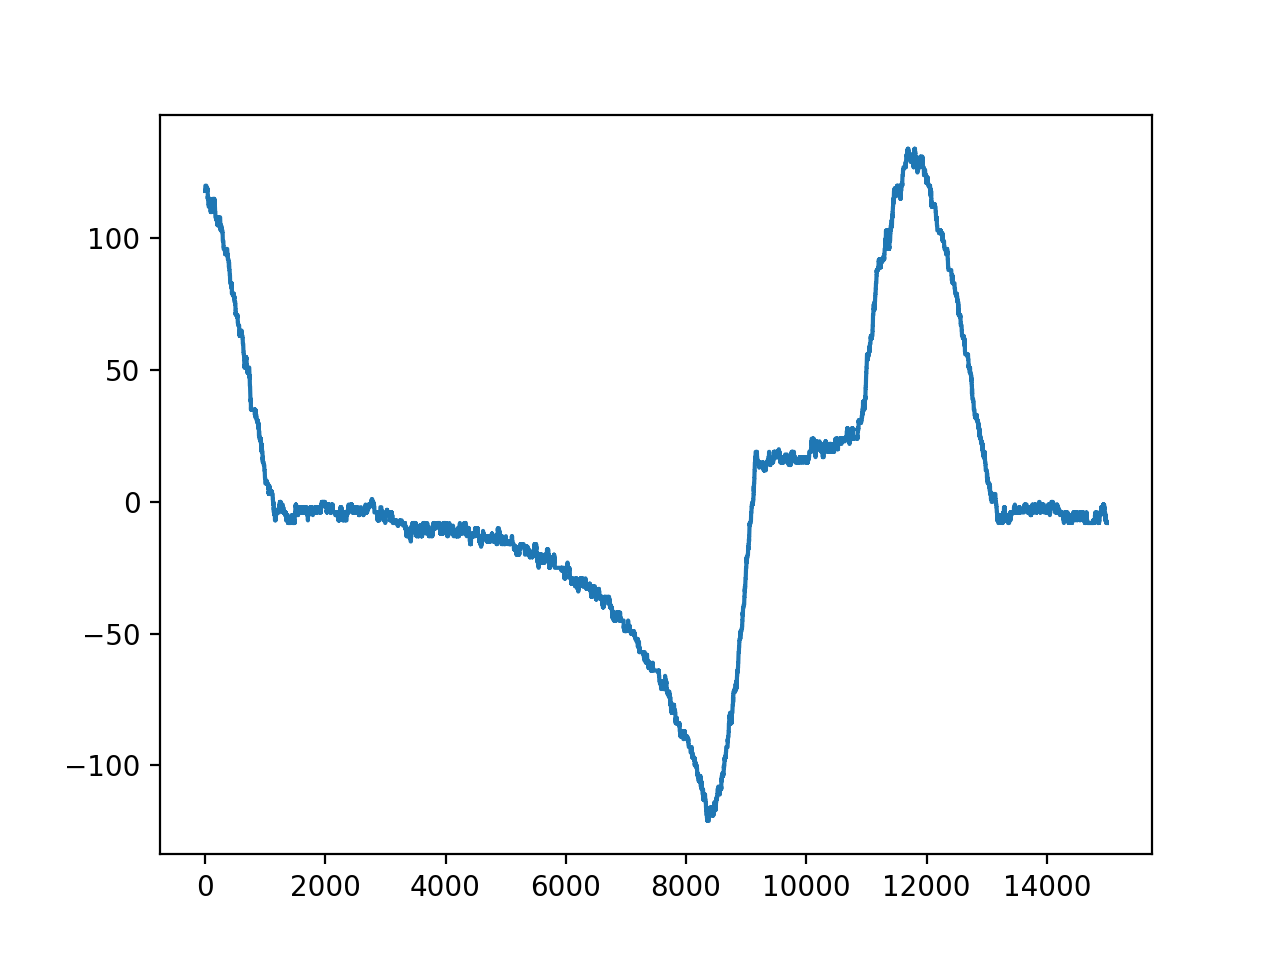

In [32]:
# plt.plot(, lefts[1])

%matplotlib notebook


xs = np.linspace(1, len(lefts[1]), len(lefts[1]))


plt.plot(xs, idks[5])






total_time 20
window_size 0.75
N_loops 266
T_acquire 0.075
N_loops_over_window 10.0
window_size 0.75
hyp_detection_buffer 0.25
hyp_event_threshold_cps 60
hyp_event_history 5
hyp_consecutive_triggers 3
hyp_consecutive_reset 1
5000
4148.0
5000
5280.0
5000
5328.0
5000
5140.0
5000
3464.0
5000
2196.0
5000
1780.0
5000
2268.0
5000
2240.0
5000
1396.0
5000
0.0
5000
0.0
5000
0.0
EVENT!!!
CONGRATULATIONS, ITS AN idk!


<IPython.core.display.Javascript object>


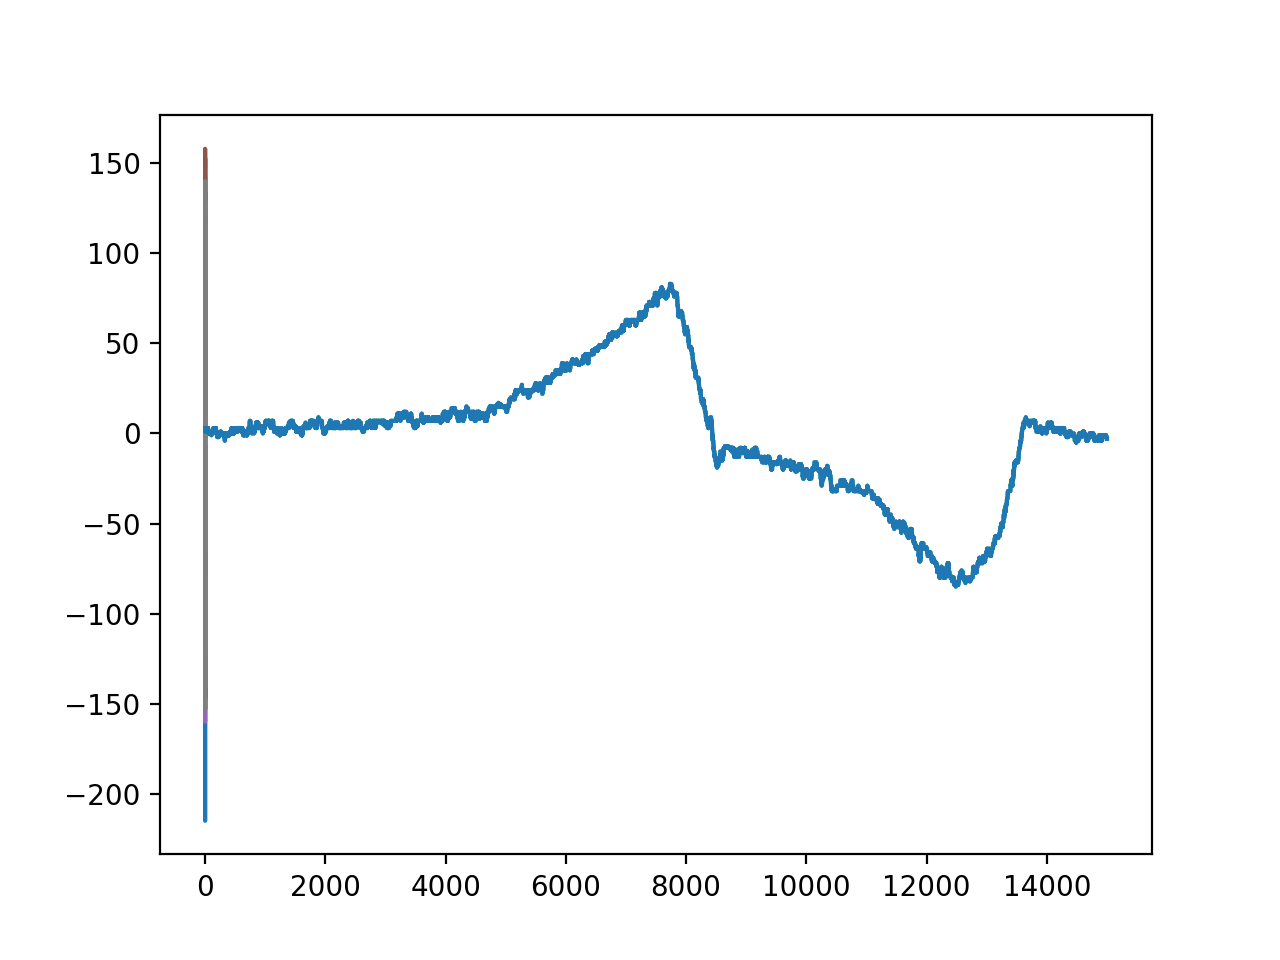

5000
648.0
5000
1268.0
5000
1268.0
5000
1268.0
5000
0.0
5000
168.0
5000
384.0
5000
1540.0
5000
3628.0
5000
4872.0
5000
6292.0
5000
6332.0
5000
4952.0
5000
2760.0
5000
632.0
5000
56.0
5000
244.0
5000
244.0
5000
188.0
5000
0.0
5000
0.0
5000
948.0
5000
1184.0
5000
1184.0
5000
504.0
5000
12.0
5000
12.0
5000
12.0
EVENT!!!
CONGRATULATIONS, ITS AN L!
5000
0.0
5000
0.0
5000
0.0
5000
1052.0
5000
1308.0
5000
1308.0
5000
372.0
5000
0.0
5000
0.0
5000
28.0
EVENT!!!
CONGRATULATIONS, ITS AN idk!
5000
28.0
5000
100.0
5000
72.0
5000
72.0
5000
0.0
5000
0.0
5000
896.0
5000
2908.0
5000
4004.0
5000
5148.0
5000
4172.0
5000
3404.0
5000
2052.0
5000
672.0
5000
24.0
5000
24.0
5000
24.0
EVENT!!!
CONGRATULATIONS, ITS AN idk!
5000
0.0
5000
0.0
5000
1116.0
5000
3140.0
5000
4768.0
5000
6012.0
5000
4260.0
5000
2444.0
5000
792.0
5000
64.0
5000
64.0
5000
64.0
5000
0.0
5000
24.0
5000
920.0
5000
1892.0
5000
1868.0
5000
1468.0
5000
0.0
5000
8.0
5000
8.0
EVENT!!!
CONGRATULATIONS, ITS AN idk!
5000
8.0
5000
0.0
5000
16.0
500

In [7]:



# # take continuous data stream 
# inputBufferSize = 10000 # keep betweein 2000-20000




    

# take continuous data stream 
# inputBufferSize = 1000 # keep betweein 2000-20000




samprate = 20000

# %matplotlib notebook


total_time = 20  #len(wav_array)/samprate; # time in seconds [[1 s = 20000 buffer size]]
window_size = 0.75; # time plotted in window [s]

N_loops_over_window = 10
inputBufferSize = int(window_size/N_loops_over_window * samprate)

N_loops =(total_time*samprate)//inputBufferSize  # len(wav_array)//inputBufferSize 
T_acquire = inputBufferSize/samprate    # length of time that data is acquired for 
N_loops_over_window = window_size/T_acquire    # total number of loops to cover desire time window



print("total_time", total_time)
print("window_size", window_size)
print("N_loops", N_loops)
print("T_acquire", T_acquire)
print("N_loops_over_window", N_loops_over_window)




# # Initialise plot
# min_y = -300 #np.min(wav_array)
# max_y = 300 #np.max(wav_array)
# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
# plt.ion()
# fig.show()
# fig.canvas.draw()



# Classifier hyperparameters
window_size
hyp_detection_buffer = 0.25 # seconds - how much time to shave off either end of the window in order to define the middle portion
hyp_event_threshold_cps = 60 # crossings per second
hyp_event_history = 5
hyp_consecutive_triggers = 3
hyp_consecutive_reset = 1


print("window_size", window_size)
print("hyp_detection_buffer", hyp_detection_buffer)
print("hyp_event_threshold_cps", hyp_event_threshold_cps)
print("hyp_event_history", hyp_event_history)
print("hyp_consecutive_triggers", hyp_consecutive_triggers)
print("hyp_consecutive_reset", hyp_consecutive_reset)






# Hyperparameter conversions
hyp_detection_buffer_start_ind = int(round(hyp_detection_buffer * samprate))
hyp_detection_buffer_end_ind





event_history = np.array([False]*hyp_event_history)
primed = True



for k in range(0,int(N_loops)):
    
#     # Simulate stream
#     data_temp = read_arduinbro(wav_array, inputBufferSize, k)

    # Stream
    data = read_arduino(ser,inputBufferSize)
    data_temp = process_data(data)
    


    if k < N_loops_over_window:
        if k==0:
            data_plot = data_temp
        else:
            data_plot = np.append(data_temp,data_plot)
            
        continue
    else:
        data_plot = np.roll(data_plot,len(data_temp))
        data_plot[0:len(data_temp)] = data_temp
        
        
        
    
    ### CLASSIFIER ###
    
    ## EVENT DETECTION ##
    
    
#     print(hyp_detection_buffer_ind)
#     print(len(data_plot))
    interval = data_plot[hyp_detection_buffer_ind:-hyp_detection_buffer_ind] # Take middle part of window
    
    
#     print(len(data_plot))
#     print(len(interval))
#     print(hyp_detection_buffer_ind)
    print(len(interval))
    test_stat = np.sum(interval[0:-1] * interval[1::] <= 0) # Calculate test stat (zero crossings) 
    test_stat = test_stat/(len(interval)/samprate) # convert to crossings per second
    
    print(test_stat)
    
    is_event = (test_stat < hyp_event_threshold_cps) # Test threshold
    
    ## KEEP HISTORY ##
    
    event_history[1::] = event_history[0:-1]
    event_history[0] = is_event
        
    
    if np.all(event_history[0:hyp_consecutive_triggers]) and primed:
        timer = 20
        
        print("EVENT!!!")
        
        prediction = classify_event(data_plot)
        
        print(f"CONGRATULATIONS, ITS AN {prediction}!")
        
        t = (min(k+1,N_loops_over_window))*inputBufferSize/samprate*np.linspace(0,1,(data_plot).size)
        t_arr = t

        
        plt.plot(t,data_plot)
        
        primed = False
    elif np.all(~event_history[0:hyp_consecutive_reset]):
        primed = True
    
    
    
    ## PLOT ###
    
    
#     t = (min(k+1,N_loops_over_window))*inputBufferSize/samprate*np.linspace(0,1,(data_plot).size)
#     ax1.clear()
#     if np.all(event_history[0:hyp_consecutive_triggers]) and timer >0:
#         ax1.annotate(f"ITS AN {prediction}!!!", (window_size/2, max_y-50))
#         timer -= 1
#     ax1.set_xlim(0, window_size)
#     ax1.set_ylim(min_y, max_y)
#     plt.xlabel('time [s]')
#     ax1.plot(t,data_plot)
#     fig.canvas.draw()    
#     plt.show()

In [8]:
print(hyp_detection_buffer_ind)


5000


In [9]:
#len(wav_array[0::])

In [10]:
# close serial port if necessary
if ser.read():
    ser.flushInput()
    ser.flushOutput()
    ser.close()